In [147]:
pip install pypdf spire.doc

   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ----------------------------- ---------- 21.2/28.9 MB 100.5 MB/s eta 0:00:01
   ---------------------------------------- 28.9/28.9 MB 67.6 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pypdf]
   ---------------------------------------- 0/3 [pypdf]
   ---------------------------------------- 0/3 [pypdf]
   ------------- -------------------------- 1/3 [plum-dispatch]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc]
   -------------------------- ------------- 2/3 [spire.doc


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
pip install sumy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------------------------------- ------ 5.2/6.3 MB 25.8 MB/s eta 0:00:01
   ---------------------------------------- 6.3/


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk
from  nltk.tokenize import word_tokenize
from nltk import pos_tag

In [144]:
import spacy
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [169]:
from pypdf import PdfReader
from spire.doc import Document,FixedLayoutDocument
import re

In [180]:
import sumy

In [7]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------  12.6/12.8 MB 82.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 58.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
nlp = spacy.load('en_core_web_sm')

In [15]:
sent = nlp('''
Mark Zukerberg will meet Aditya Joshi
 on Monday 25 Novemeber 2025, 10am for $3 Trillion deal
 at Pune for second time
''')

In [16]:
sent


Mark Zukerberg will meet Aditya Joshi
 on Monday 25 Novemeber 2025, 10am for $3 Trillion deal
 at Pune for second time

In [17]:
sent.ents

(Mark Zukerberg,
 Aditya Joshi
  ,
 Monday 25 Novemeber 2025,
 10am,
 $3 Trillion,
 second)

In [33]:
for ent in sent.ents:
    print(ent.text,'\t->',ent.label_)

Mark Zukerberg 	-> PERSON
Aditya Joshi
  	-> PERSON
Monday 25 Novemeber 2025 	-> DATE
10am 	-> TIME
$3 Trillion 	-> MONEY
second 	-> ORDINAL


In [37]:
spacy.explain("ORDINAL")

'"first", "second", etc.'

In [38]:
raw_text = '''Alaska (/əˈlæskə/ ⓘ ə-LASS-kə) is a non-contiguous U.S. state on the northwest extremity of North America. Part of the Western United States region, it is one of the two non-contiguous U.S. states, alongside Hawaii. Alaska is considered to be the northernmost, westernmost, and easternmost (the Aleutian Islands cross the 180th meridian into the eastern hemisphere) state in the United States. It borders the Canadian territory of Yukon and the province of British Columbia to the east. It shares a western maritime border, in the Bering Strait, with Russia's Chukotka Autonomous Okrug. The Chukchi and Beaufort Seas of the Arctic Ocean lie to the north, and the Pacific Ocean lies to the south. It is a semi-exclave of the U.S., and is the largest exclave in the world.

Alaska is the largest U.S. state by area, comprising more total area than the following three largest states of Texas, California, and Montana combined, and is the seventh-largest subnational division in the world. It is the third-least populous and most sparsely populated U.S. state. With a population of 740,133 in 2024, it is the most populous territory in North America located mostly north of the 60th parallel, with more than quadruple the combined populations of Northern Canada and Greenland.[6] Alaska contains the four largest cities in the United States by area, including the state capital of Juneau. Alaska's most populous city is Anchorage, and approximately half of Alaska's residents live within its metropolitan area.'''

In [39]:
sent1 = nlp(raw_text)

In [41]:
for ent in sent1.ents:
    print(ent.text,'--->',ent.label_)

Alaska ---> GPE
ə-LASS-kə ---> PERSON
U.S. ---> GPE
North America ---> LOC
Western United States ---> GPE
one ---> CARDINAL
two ---> CARDINAL
U.S. ---> GPE
Hawaii ---> GPE
Alaska ---> GPE
the United States ---> GPE
Canadian ---> NORP
Yukon ---> NORP
British Columbia ---> GPE
the Bering Strait ---> LOC
Russia ---> GPE
Chukotka Autonomous Okrug ---> FAC
Chukchi ---> GPE
the Arctic Ocean ---> LOC
the Pacific Ocean ---> LOC
U.S. ---> GPE
Alaska ---> GPE
U.S. ---> GPE
three ---> CARDINAL
Texas ---> GPE
California ---> GPE
Montana ---> GPE
seventh ---> ORDINAL
third ---> ORDINAL
U.S. ---> GPE
740,133 ---> CARDINAL
2024 ---> DATE
North America ---> LOC
60th ---> ORDINAL
Northern Canada ---> LOC
Alaska ---> GPE
four ---> CARDINAL
the United States ---> GPE
Juneau ---> GPE
Alaska ---> GPE
Anchorage ---> GPE
approximately half ---> CARDINAL
Alaska ---> GPE


In [50]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

Diaplay the NER in interactive way

In [46]:
from spacy import displacy

In [47]:
displacy.render(sent,style = 'ent',jupyter = True)

In [53]:
displacy.render(sent1,style = 'ent',jupyter = True)

In [55]:
#extract person names from the text
icc_text = "The Chairman heads the board of directors, and on 26 June 2014 Narayanaswami Srinivasan, the former president of Board of Control for Cricket in India, was announced as the first chairman of the council.[8] The role of ICC president became a largely honorary position after the establishment of the chairman role and other changes made to the ICC constitution in 2014. It has been claimed that the 2014 changes have handed control to the 'Big Three' nations of England, India and Australia.[9] The last ICC president was Zaheer Abbas,[10] who was appointed in June 2015 following the resignation of Mustafa Kamal in April 2015. When the post of ICC president was abolished in April 2016, Shashank Manohar, who replaced Srinivasan in October 2015, became the first independent elected chairman of the ICC.[11] Sanjog Gupta became the seventh CEO of the International Cricket Council on July 7, 2025, succeeding Jay Shah.[12] His role involves managing T20 league growth, sustaining cricket formats, promoting Olympic inclusion, and expanding global engagement"

In [59]:
persons = set()
for ent in nlp(icc_text).ents:
    if(ent.label_ == 'PERSON'):
        persons.add(ent.text)
persons

{'Jay Shah.[12',
 'Mustafa Kamal',
 'Narayanaswami Srinivasan',
 'Sanjog Gupta',
 'Shashank Manohar',
 'Zaheer'}

WordNet

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
from nltk.corpus import wordnet

In [62]:
wordnet

<WordNetCorpusReader in 'C:\\Users\\dai\\AppData\\Roaming\\nltk_data\\corpora\\wordnet.zip/wordnet/'>

In [64]:
x = wordnet.synsets('create')
x

[Synset('make.v.03'),
 Synset('create.v.02'),
 Synset('create.v.03'),
 Synset('create.v.04'),
 Synset('create.v.05'),
 Synset('produce.v.02')]

In [65]:
synonyms = set()
for word in wordnet.synsets('create'):
    synonyms.add(word.lemmas()[0].name())

In [66]:
synonyms

{'create', 'make', 'produce'}

In [74]:
syn = set()
for word in wordnet.synsets('associating'):
    syn.add(word.lemmas()[1].name())

In [75]:
syn

{'associate', 'tie_in'}

Definitions an exampls

In [78]:
word = wordnet.synsets('post')
print(word[0].name())
print(word[0].lemmas()[1].name())
print(word[0].definition())
print(word[0].examples())

post.n.01
station
the position where someone (as a guard or sentry) stands or is assigned to stand
['a soldier manned the entrance post', 'a sentry station']


In [79]:
for word in wordnet.synsets('sound',pos = 'v'):
    print(word.name())

sound.v.01
sound.v.02
sound.v.03
sound.v.04
voice.v.02
sound.v.06
fathom.v.02


In [80]:
for word in wordnet.synsets('sound',pos = 'n'):
    print(word.name(),word.definition())

sound.n.01 the particular auditory effect produced by a given cause
sound.n.02 the subjective sensation of hearing something
sound.n.03 mechanical vibrations transmitted by an elastic medium
sound.n.04 the sudden occurrence of an audible event
audio.n.01 the audible part of a transmitted signal
phone.n.02 (phonetics) an individual sound unit of speech without concern as to whether or not it is a phoneme of some language
strait.n.01 a narrow channel of the sea joining two larger bodies of water
sound.n.08 a large ocean inlet or deep bay


Extract specific POS from the word

In [96]:
verbs = set()
nouns = set()
adjts = set()

In [97]:
#extract the synonyms sound
for word in wordnet.synsets('sound'):
    pos_code = word.pos()
    if(pos_code == wordnet.NOUN):
        nouns.add(word.name())
    if(pos_code == wordnet.VERB):
        verbs.add(word.name())
    if(pos_code == wordnet.ADJ):
        adjts.add(word.name())

In [98]:

print(nouns)
print(verbs)
adjts

{'sound.n.03', 'sound.n.08', 'sound.n.04', 'sound.n.02', 'audio.n.01', 'phone.n.02', 'strait.n.01', 'sound.n.01'}
{'sound.v.04', 'sound.v.02', 'voice.v.02', 'sound.v.01', 'sound.v.06', 'fathom.v.02', 'sound.v.03'}


{'sound.a.01', 'sound.a.03'}

In [94]:
for word in wordnet.synsets('sound', pos = 'a'):
    adjts.add(word.lemmas()[0].name())

In [95]:
adjts

{Lemma('good.s.15.good'),
 Lemma('healthy.s.03.healthy'),
 Lemma('heavy.s.20.heavy'),
 Lemma('legal.s.01.legal'),
 Lemma('reasoned.s.01.reasoned'),
 Lemma('sound.a.01.sound')}

Retrive the antonyms

In [91]:
antos = set()
for word in wordnet.synsets('possible'):
    for lemma in word.lemmas():
        if lemma.antonyms():
            antos.add(lemma.antonyms()[0].name())

In [92]:
antos

{'actual', 'impossible'}

Extract Hypernyms

In [101]:
word = 'soil'
synsets = wordnet.synsets(word)
synsets

[Synset('dirt.n.02'),
 Synset('soil.n.02'),
 Synset('land.n.02'),
 Synset('territory.n.03'),
 Synset('dirty.v.01')]

In [104]:
print('Hypernames of Soil: ')
for x in synsets:
    hypernyms = x.hypernyms()
    for h in hypernyms:
        print(h.name())

Hypernames of Soil: 
dirtiness.n.01
earth.n.02
object.n.01
geographical_area.n.01
change.v.01


Disambiguation Lesk Algo

In [105]:
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk

In [110]:
sent1 = 'This device is used to jam the signal'
sent2 = 'There is a heavy traffic jam here. We stuck at the same place.'
al = lesk(word_tokenize(sent2),'jam')

In [111]:
al.definition()

'informal terms for a difficult situation'

Information Extraction

In [121]:
# pip install bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
import urllib
import requests
from bs4  import BeautifulSoup

In [129]:
from nltk.tokenize import word_tokenize

In [114]:
url = 'https://en.wikipedia.org/wiki/Rajgad'

In [115]:
headers = {
    'User-Agent':'Custom-Script/1.9 (tushar@gmail.com)',
    'Accept-language':'en-US,en;q=0.5'
}

In [117]:
response = requests.get(url,headers = headers)

In [119]:
response

<Response [200]>

In [120]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [123]:
soup = BeautifulSoup(response.text,'html.parser')
type(soup)

bs4.BeautifulSoup

In [124]:
soup.find('title')

<title>Rajgad - Wikipedia</title>

In [127]:
text = soup.get_text()

In [128]:
print(text)





Rajgad - Wikipedia






























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in




























Contents
move to sidebar
hide




(Top)





1
History




Toggle History subsection





1.1
List of chronological events










2
Tourism








3
Gallery








4
See also








5
References








6
External links


















Toggle the table of contents







Rajgad



11 languages




EspañolFrançaisहिन्दीעבריתमराठीمصرىनेपाल भाषाپنجابیதமிழ்Türkçeاردو

Edit links











ArticleTalk





English

















ReadEditView history







Tools





Tools


In [130]:
tokens = word_tokenize(text)

In [132]:
tokens = ' '.join(tokens)

In [133]:
tokens

"Rajgad - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide ( Top ) 1 History Toggle History subsection 1.1 List of chronological events 2 Tourism 3 Gallery 4 See also 5 References 6 External links Toggle the table of contents Rajgad 11 languages EspañolFrançaisहिन्दीעבריתमराठीمصرىनेपाल भाषाپنجابیதமிழ்Türkçeاردو Edit links ArticleTalk English ReadEditView history Tools Tools move to sidebar hide Actions ReadEditView history General What links hereRelated changesUpload filePermanent linkPage informationCite this pageGet shortened URLDownload QR code Print/export Download as PDFPrintable version In other projects Wikimedia CommonsWikivoyageWikidata item Appearance move to sidebar hid

In [134]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

All in one, Frequency Distribution Graph

In [140]:
swords = stopwords.words('english')

<Axes: xlabel='Samples', ylabel='Counts'>

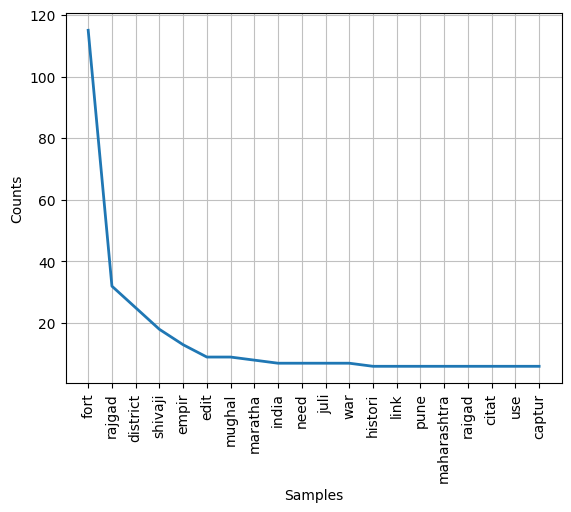

In [145]:
url = "https://en.wikipedia.org/wiki/Rajgad"
headers = {
    'User-Agent':'Custom-Script/1.9 (abc@gmail.com)',
    'Accept-language':'en-US,en;q=0.5'
}
response = requests.get(url,headers = headers)
soup = BeautifulSoup(response.text,'html.parser')
text = soup.get_text()
tokens = word_tokenize(text)
tokens = " ".join(tokens)
tokens1 = word_tokenize(tokens)
tokens2 = [t for t in  tokens1 if t.isalpha() or t.isdigit()]
tokens3 = [ps.stem(t.lower()) for t in tokens2 if t.lower() not in swords]
freq = FreqDist(tokens3)
freq.plot(20)

In [146]:
freq.most_common(10)

[('fort', 115),
 ('rajgad', 32),
 ('district', 25),
 ('shivaji', 18),
 ('empir', 13),
 ('edit', 9),
 ('mughal', 9),
 ('maratha', 8),
 ('india', 7),
 ('need', 7)]

mitucoin

In [150]:
reader = PdfReader(r"D:\NLPDS\course.pdf")

In [152]:
reader.pages[0]

{'/Type': '/Page',
 '/MediaBox': [0, 0, 595.2, 841.92],
 '/Resources': {'/Font': {'/F1': {'/Type': '/Font',
    '/Subtype': '/TrueType',
    '/Name': '/F1',
    '/BaseFont': '/Times New Roman,Bold',
    '/Encoding': '/WinAnsiEncoding',
    '/FontDescriptor': {'/Type': '/FontDescriptor',
     '/FontName': '/Times New Roman,Bold',
     '/Flags': 32,
     '/ItalicAngle': 0,
     '/Ascent': 891,
     '/Descent': -216,
     '/CapHeight': 677,
     '/AvgWidth': 427,
     '/MaxWidth': 2558,
     '/FontWeight': 700,
     '/XHeight': 250,
     '/Leading': 42,
     '/StemV': 42,
     '/FontBBox': [-558, -216, 2000, 677]},
    '/FirstChar': 32,
    '/LastChar': 121,
    '/Widths': [250,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     333,
     333,
     0,
     0,
     250,
     333,
     250,
     278,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     333,
     0,
     0,
     0,
     0,
     0,
     0,
     722,
     0,
     72

In [153]:
page1 = reader.pages[0]
page1.extract_text()

' \n \n \n \n \n \nDECCAN COLLEGE \nPost-Graduate and Research Institute \nPune 411006 \n[Declared as deemed to be University under Section 3 of UGC Act 1956] \n \nADMISSION NOTICE: 2024 \n[NOTICE NO. AS/2024/1331] \nI. Admissions are open for the following courses for the year 2024 \n \n1. ONLINE Advanced Certificate course  on ‘Python Programming for Computational \nLinguistics and Natural Language Processing’ (Please check detailed course information \nin Annexure-I below.) \n \n\uf0b7 Duration:2 months (30 hrs: 2 Credits) \n \n\uf0b7 Intake Capacity:20 seats \n \n\uf0b7 Last date of Registration: 1st May 2024 \n \n\uf0b7 Eligibility:10+2 or equivalent  from any recognised institute AND have (i) OR (ii) \nmentioned below; \ni) Should have completed the certificate course on “Python Programming for NLP and \nComputational Linguistics” jointly offered by Deccan College Post -Graduate \nResearch Institute, Pune and MITU Skillologies, Pune. \n \nOR \nii) Should have - \n\uf0fc Practical

In [156]:
pgno = 0
for page in reader.pages:
    pgno+=1
    print("Page: ",pgno)
    print(page.extract_text())

Page:  1
 
 
 
 
 
 
DECCAN COLLEGE 
Post-Graduate and Research Institute 
Pune 411006 
[Declared as deemed to be University under Section 3 of UGC Act 1956] 
 
ADMISSION NOTICE: 2024 
[NOTICE NO. AS/2024/1331] 
I. Admissions are open for the following courses for the year 2024 
 
1. ONLINE Advanced Certificate course  on ‘Python Programming for Computational 
Linguistics and Natural Language Processing’ (Please check detailed course information 
in Annexure-I below.) 
 
 Duration:2 months (30 hrs: 2 Credits) 
 
 Intake Capacity:20 seats 
 
 Last date of Registration: 1st May 2024 
 
 Eligibility:10+2 or equivalent  from any recognised institute AND have (i) OR (ii) 
mentioned below; 
i) Should have completed the certificate course on “Python Programming for NLP and 
Computational Linguistics” jointly offered by Deccan College Post -Graduate 
Research Institute, Pune and MITU Skillologies, Pune. 
 
OR 
ii) Should have - 
 Practical knowledge of Python Programming 
 Basics of NLP 

Copy the data from cours.pdf and store it in course.txt

In [160]:
text = ''
for page in reader.pages:
    text += page.extract_text()

with open(r"D:\NLPDS\course.txt","w",encoding = 'utf-8') as f:
    f.write(text)

Read data from doc files

In [163]:
document = Document()
document.LoadFromFile(r'D:\NLPDS\spp.docx')

In [164]:
text = document.GetText()
text

'Evaluation Warning: The document was created with Spire.Doc for Python.\r\nMr. Satish Prakashrao Pise\r\nEmail – satish.pise.sgp@gmail.com\t\t\t\tContact No. 9096679875,7768962144\r\nObjective\r\nWork with professional organization and contribute my excellent work with result oriented performance for continuous improvement in quality and development.  \r\nExperience – 6.3 Years\r\n1.  Current working in Sanjay Ghodawat Polytechnic, Kolhapur.\r\n* Post-Lecturer \r\n* Duration- 4.3 years, 1st June 2013 to till date\r\n* Responsibilities - Teaching, guiding, motivating students as a class teacher, lecturer, and working as a lab in-charge, spoken tutorial project, IIT Bombay coordinator.\r\nOrganizing and conducting trainings for students.\r\n* Subject Taught – RDBMS, CNE, CMF, CHM, CHN, NMA, LPR, DLS, GUI, BWP.\r\n2.  Samarth Polytechnic Belhe, Pune\r\n* Post-Lecturer(Ad-hoc)\r\n* Duration-8months, August 2012 to April 2013\r\n* Responsibilities – Teaching.\r\n* Subject Taught – CMF, MIS

paragrpah by paragraph

In [167]:
layout = FixedLayoutDocument(document)
page1 = layout.Pages[0]

In [168]:
print(page1.Text)

Evaluation Warning: The document was created with Spire.Doc for Python.¶
Mr. Satish Prakashrao Pise¶
Email – [|satish.pise.sgp@gmail.]comContact No. 9096679875,7768962144¶
Objective¶
Work with professional organization and contribute my excellent work with result oriented performance for 
continuous improvement in quality and development.  ¶
Experience – 6.3 Years¶
1.Current working in Sanjay Ghodawat Polytechnic, Kolhapur.¶
Post-Lecturer ¶
Duration- 4.3 years, 1st June 2013 to till date¶
Responsibilities - Teaching, guiding, motivating students as a class teacher, lecturer, and working as a lab 
in-charge, spoken tutorial project, IIT Bombay coordinator.¶
Organizing and conducting trainings for students.¶
Subject Taught – RDBMS, CNE, CMF, CHM, CHN, NMA, LPR, DLS, GUI, BWP.¶
2.Samarth Polytechnic Belhe, Pune¶
Post-Lecturer(Ad-hoc)¶
Duration-8months, August 2012 to April 2013¶
Responsibilities – Teaching.¶
Subject Taught – CMF, MIS, MAN¶
3.Late. N.B. Chhabada Inst

In [174]:
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
re.findall(pattern,text)

['satish.pise.sgp@gmail.com']

In [176]:
tokens = text.split()

In [178]:
for word in tokens:
    if '@' in word:
        print(word)

satish.pise.sgp@gmail.com


Extractive Summarization

In [1]:
from sumy.summarizers.text_rank import TextRankSummarizer

#import the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from nltk.tokenize import sent_tokenize

In [2]:
len(sent_tokenize(text))

NameError: name 'text' is not defined

In [3]:
#Create the parser
text_parser=PlaintextParser.from_string(text,Tokenizer("english"))

NameError: name 'text' is not defined

In [ ]:
#Create the object of summarizer
text_rank_summarizer=TextRankSummarizer()

In [ ]:
summary=text_rank_summarizer(text_parser.document,sentences_count=3)
summary[0]

In [ ]:
for s in summary:
    print(s)

In [ ]:
htext="""बाघ या व्याघ्र जंगल में रहने वाला मांसाहारी स्तनधारी पशु है। यह अपनी प्रजाति में सबसे बड़ा और ताकतवर पशु है। यह तिब्बत, श्रीलंका और अंडमान निकोबार द्वीप-समूह को छोड़कर एशिया के अन्य सभी भागों में पाया जाता है। यह भारत, नेपाल, भूटान, कोरिया और इंडोनेशिया में अधिक संख्या में पाया जाता है। इसके शरीर का रंग लाल और पीला का मिश्रण है। इस पर काले रंग की धारियाँ पायी जाती हैं। वक्ष के भीतरी भाग और पाँव का रंग सफेद होता है। बाघ १३ फीट लम्बा और ३०० किलो वजनी हो सकता है। बाघ का वैज्ञानिक नाम "पेंथेरा टिग्रिस" (Panthera tigris) है। यह भारत का राष्ट्रीय प्राणी भी है।"""

In [ ]:
text_parser=PlaintextParser.from_string(htext,Tokenizer("english"))
text_rank_summarizer=TextRankSummarizer()
summary=text_rank_summarizer(text_parser.document,sentences_count=3)
summary